In [1]:
import os
import csv
import zipfile
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
if os.path.exists("marvel.csv"):
    os.remove("marvel.csv")
if os.path.exists("marvel-wikia-data.csv"):
    os.remove("marvel-wikia-data.csv")
api = KaggleApi()
api.authenticate()
api.dataset_download_file('fivethirtyeight/fivethirtyeight-comic-characters-dataset', 'marvel-wikia-data.csv')
with zipfile.ZipFile("marvel-wikia-data.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()
os.remove("marvel-wikia-data.csv.zip")

In [2]:
data = pd.read_csv('marvel-wikia-data.csv')
to_drop = ['page_id', 'urlslug', 'GSM', 'APPEARANCES', 'FIRST APPEARANCE', 'Year']
data.drop(to_drop, inplace =True, axis=1)
data.dropna(subset = ['ALIGN'], inplace = True)
data.ALIGN.replace(['Neutral Characters' , 'Good Characters', 'Bad Characters'] , [0, 0, 1], inplace = True )
data.to_csv('marvel.csv', sep = ',')
os.remove("marvel-wikia-data.csv")
prid = pd.read_csv("marvel.csv")

Black Hair               3246
Brown Hair               1986
Blond Hair               1321
No Hair                  1049
Bald                      748
White Hair                659
Red Hair                  511
Grey Hair                 439
Green Hair                 98
Auburn Hair                67
Blue Hair                  46
Strawberry Blond Hair      40
Purple Hair                38
Orange Hair                34
Variable Hair              29
Pink Hair                  25
Yellow Hair                17
Silver Hair                14
Gold Hair                   7
Reddish Blond Hair          6
Light Brown Hair            6
Magenta Hair                4
Orange-brown Hair           3
Bronze Hair                 1
Dyed Hair                   1
Name: HAIR, dtype: int64


array([<AxesSubplot:title={'center':'HAIR'}>], dtype=object)

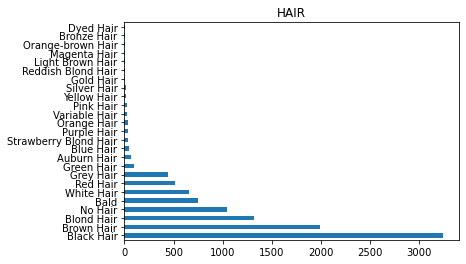

In [3]:
g1 = prid['HAIR'].value_counts()
print(g1)
g1.plot.barh(subplots=True)

Blue Eyes          1757
Brown Eyes         1669
Green Eyes          557
Black Eyes          451
Red Eyes            431
White Eyes          357
Yellow Eyes         226
Grey Eyes            86
Hazel Eyes           69
Variable Eyes        44
Purple Eyes          29
Orange Eyes          25
Pink Eyes            17
One Eye              17
Gold Eyes            14
Violet Eyes          11
Silver Eyes          10
Amber Eyes            8
Multiple Eyes         6
No Eyes               6
Yellow Eyeballs       5
Black Eyeballs        3
Magenta Eyes          2
Compound Eyes         1
Name: EYE, dtype: int64


array([<AxesSubplot:title={'center':'EYE'}>], dtype=object)

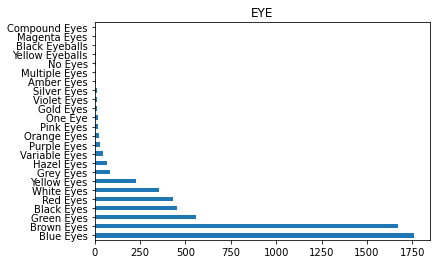

In [4]:
g2 = prid['EYE'].value_counts()
print(g2)
g2.plot.barh(subplots=True)

Male Characters           9744
Female Characters         3153
Agender Characters          43
Genderfluid Characters       2
Name: SEX, dtype: int64


array([<AxesSubplot:title={'center':'SEX'}>], dtype=object)

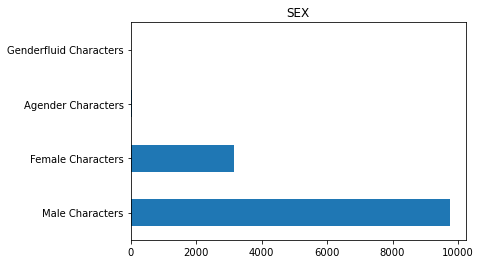

In [5]:
g3 = prid['SEX'].value_counts()
print(g3)
g3.plot.barh(subplots=True)

Secret Identity                  5654
Public Identity                  3786
No Dual Identity                 1511
Known to Authorities Identity      15
Name: ID, dtype: int64


array([<AxesSubplot:title={'center':'ID'}>], dtype=object)

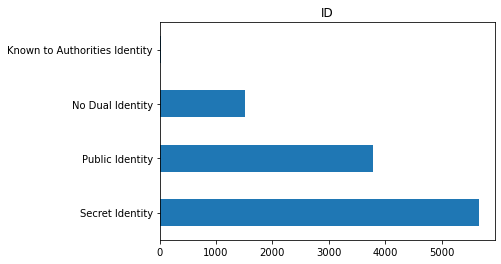

In [6]:
g4 = prid['ID'].value_counts()
print(g4)
g4.plot.barh(subplots=True)

Living Characters      10265
Deceased Characters     3299
Name: ALIVE, dtype: int64


array([<AxesSubplot:title={'center':'ALIVE'}>], dtype=object)

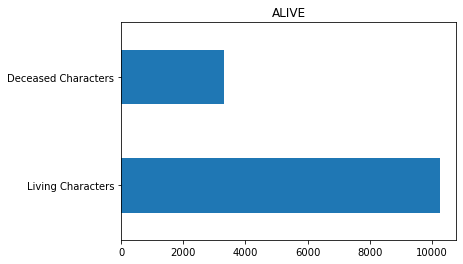

In [7]:
g5 = prid['ALIVE'].value_counts()
print(g5)
g5.plot.barh(subplots=True)